In [2]:
import pandas as pd
data = pd.read_csv('data.csv')
data = data.drop(columns=['is_weekend','is_holiday','zone_desc','oneway','geometry','zone_group','bldg_density'])
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3213 non-null   int64  
 1   magnitude_of_delay     3213 non-null   int64  
 2   from                   3213 non-null   object 
 3   to                     3213 non-null   object 
 4   length                 3213 non-null   float64
 5   flow_speed             3213 non-null   float64
 6   travel_time            3213 non-null   float64
 7   risk                   3213 non-null   int64  
 8   is_heavy_traffic       3213 non-null   float64
 9   is_lane_closed         3213 non-null   int64  
 10  is_queuing_traffic     3213 non-null   int64  
 11  is_slow_traffic        3213 non-null   int64  
 12  is_stationary_traffic  3213 non-null   int64  
 13  day_of_week            3213 non-null   int64  
 14  hour_of_day            3213 non-null   int64  
 15  is_w

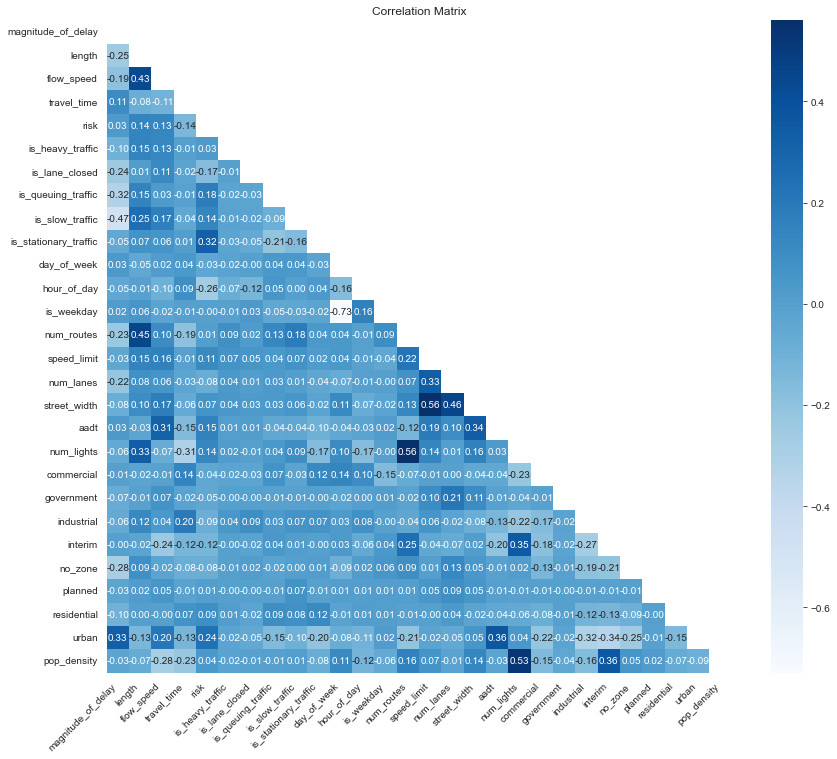

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop the 'id' column if it exists
data = data.drop(columns='id', errors='ignore')

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the background color to white
plt.figure(figsize=(14, 12))
sns.set_style("white")
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", mask=mask, cmap='Blues', annot_kws={"size": 10})
ax.set_facecolor('white')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add ticks to the labels
ax.tick_params(axis='both', which='both', length=5)

plt.show()



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


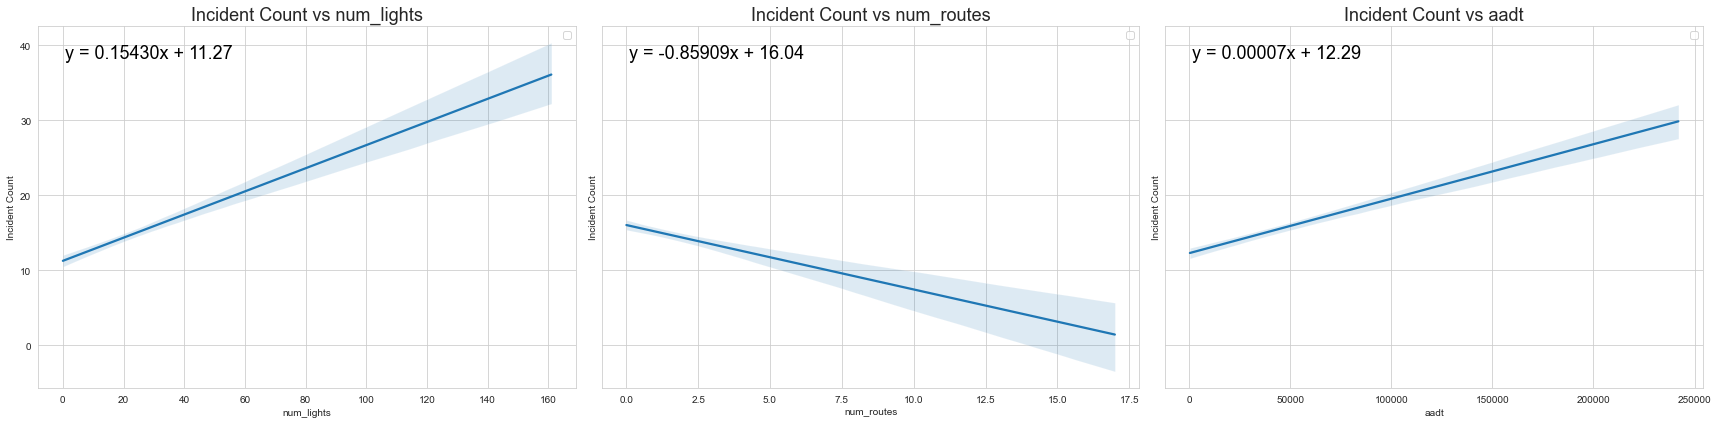

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Calculate incident counts per 'id'
incident_counts = data['id'].value_counts().reset_index()
incident_counts.columns = ['id', 'incident_count']

# Merge the incident counts with the original data
data_with_counts = data.merge(incident_counts, on='id')

# List of x-axis features to plot (excluding 'length')
x_features = ['num_lights', 'num_routes', 'aadt']

# Set the background color to white
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(x_features), figsize=(24, 6), sharey=True)

# Plot each feature in a separate subplot
for ax, feature in zip(axes, x_features):
    # Fit linear model
    X = data_with_counts[[feature]].values.reshape(-1, 1)
    y = data_with_counts['incident_count'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Plot the regression line
    sns.regplot(x=feature, y='incident_count', data=data_with_counts, scatter=False, line_kws={"label": f"R² = {r2:.2f}"}, ax=ax)
    
    # Annotate with the line equation
    ax.annotate(f'y = {model.coef_[0]:.5f}x + {model.intercept_:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=18, color='black', ha='left', va='top')
    
    ax.set_title(f'Incident Count vs {feature}', fontsize=18)
    ax.set_xlabel(feature)
    ax.set_ylabel('Incident Count')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

